<a href="https://colab.research.google.com/github/Akshar2325/Amazon-Sales-Report/blob/main/Python_Sale_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Amazon Sale Report.csv',encoding= 'unicode_escape')

In [ ]:
df.shape

(21261, 21)

In [ ]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
21256,21255,406-2387387-8947547,04-17-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,...,INR,696.0,GHAZIABAD,UTTAR PRADESH,201016.0,IN,False,NaN,NaN,NaN
21257,21256,403-8140724-2841155,04-17-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XS,Shipped,...,INR,399.0,MULAMTHURUTHY,KERALA,682314.0,IN,False,NaN,NaN,NaN
21258,21257,406-1819435-5357115,04-17-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,3XL,Shipped,...,INR,788.0,THIRUVANANTHAPURAM,KERALA,695014.0,IN,False,NaN,NaN,NaN
21259,21258,406-8977173-4635548,04-17-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,L,Cancelled,...,NaN,NaN,Ambala,HARYANA,133001.0,IN,False,NaN,NaN,NaN
21260,21259,402-6095856-9320300,04-17-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,...,INR,487.0,KOLKATA,W,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21261 entries, 0 to 21260
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               21261 non-null  int64  
 1   Order ID            21261 non-null  object 
 2   Date                21261 non-null  object 
 3   Status              21261 non-null  object 
 4   Fulfilment          21261 non-null  object 
 5   Sales Channel       21261 non-null  object 
 6   ship-service-level  21261 non-null  object 
 7   Category            21261 non-null  object 
 8   Size                21261 non-null  object 
 9   Courier Status      21261 non-null  object 
 10  Qty                 21261 non-null  int64  
 11  currency            19967 non-null  object 
 12  Amount              19967 non-null  float64
 13  ship-city           21251 non-null  object 
 14  ship-state          21251 non-null  object 
 15  ship-postal-code    21250 non-null  float64
 16  ship

In [ ]:
#drop unrelated/blank columns
df.drop(['New','PendingS'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21261 entries, 0 to 21260
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               21261 non-null  int64  
 1   Order ID            21261 non-null  object 
 2   Date                21261 non-null  object 
 3   Status              21261 non-null  object 
 4   Fulfilment          21261 non-null  object 
 5   Sales Channel       21261 non-null  object 
 6   ship-service-level  21261 non-null  object 
 7   Category            21261 non-null  object 
 8   Size                21261 non-null  object 
 9   Courier Status      21261 non-null  object 
 10  Qty                 21261 non-null  int64  
 11  currency            19967 non-null  object 
 12  Amount              19967 non-null  float64
 13  ship-city           21251 non-null  object 
 14  ship-state          21251 non-null  object 
 15  ship-postal-code    21250 non-null  float64
 16  ship

In [ ]:
pd.isnull(df)
# checking null value

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21256,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
21257,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
21258,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
21259,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True


In [ ]:
pd.isnull(df).sum()
# sum will give total values of null values

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               1294
Amount                 1294
ship-city                10
ship-state               10
ship-postal-code         11
ship-country             11
B2B                       1
fulfilled-by          13457
dtype: int64

In [ ]:
df.shape

(21261, 19)

In [ ]:
#drop null values
df.dropna(inplace=True)

In [ ]:
df.shape

(7463, 19)

In [ ]:

df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
# change data type
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [ ]:
#checking whether the  data type change or not
df['ship-postal-code'].dtype

dtype('int64')

In [ ]:
df['Date']=pd.to_datetime (df['Date'])

<ipython-input-19-5c207e96e7cb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime (df['Date'])


In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
#rename Columns
df.rename(columns={'Qty':'Quantity'})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21225,21224,408-9090489-4063510,2022-04-17,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,1,INR,399.00,BENGALURU,KARNATAKA,560047,IN,False,Easy Ship
21236,21235,408-1101626-3657132,2022-04-17,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,1,INR,1149.00,BALURGHAT,WEST BENGAL,733101,IN,False,Easy Ship
21239,21238,406-2370628-7805122,2022-04-17,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,459.00,ANTAH,RAJASTHAN,325202,IN,False,Easy Ship
21241,21240,402-6225210-2872344,2022-04-17,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,THANE,MAHARASHTRA,401107,IN,False,Easy Ship


In [ ]:
#describe() method return description of the data in the DataFrame(i.e count,mean,std,min..etc)
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,7463.000000,7463,7463.000000,7463.000000,7463.000000
mean,10961.514672,2022-04-23 13:05:42.007235584,0.872303,611.802871,458654.501005
min,0.000000,2022-04-17 00:00:00,0.000000,0.000000,110001.000000
25%,5976.500000,2022-04-20 00:00:00,1.000000,423.000000,324005.000000
50%,10594.000000,2022-04-24 00:00:00,1.000000,568.000000,495450.000000
75%,16244.500000,2022-04-26 00:00:00,1.000000,725.000000,600023.500000
max,21242.000000,2022-04-30 00:00:00,5.000000,5495.000000,989898.000000
std,5893.272176,NaN,0.349465,280.418407,197625.475674


In [ ]:

df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,B2B,fulfilled-by
count,7463,7463,7463,7463,7463,7463,7463,7463,7463,7463,7463,7463,7463,7463
unique,6806,7,1,1,1,8,10,2,1,1660,46,1,2,1
top,406-9002076-4152331,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,False,Easy Ship
freq,9,6024,7463,7463,7463,3174,1441,6482,7463,538,1252,7463,7396,7463


In [ ]:
#use describe() for specific columns
df[['Qty','Amount']].describe()

,Qty,Amount
count,7463.000000,7463.000000
mean,0.872303,611.802871
std,0.349465,280.418407
min,0.000000,0.000000
25%,1.000000,423.000000
50%,1.000000,568.000000
75%,1.000000,725.000000
max,5.000000,5495.000000


# **Exploratory Data Analysis**

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

Size

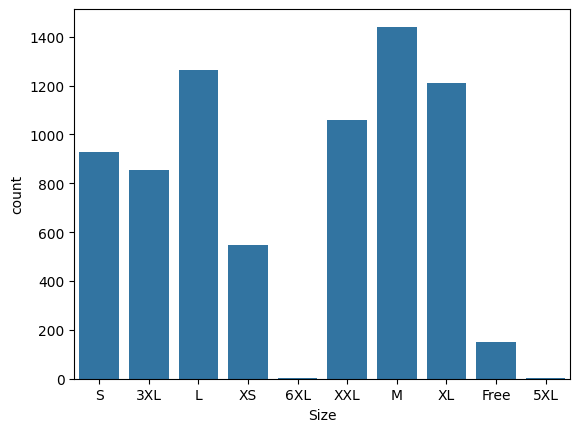

In [ ]:
ax=sns.countplot(x='Size' ,data=df)

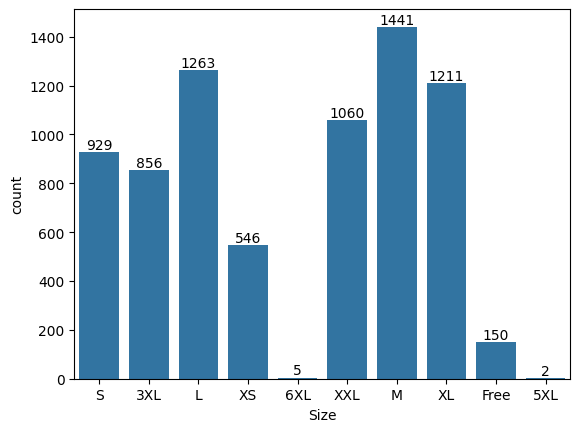

In [ ]:
ax=sns.countplot(x='Size' ,data=df)

for bars in ax.containers:
    ax.bar_label(bars)

Note: From above Graph you can see that most of the people buys M-Size

# Group By

The groupby() function in pandas is used to group data based on one or more columns in a DataFrame

In [ ]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
5,M,1263
4,L,1108
7,XL,1050
9,XXL,937
6,S,802
0,3XL,769
8,XS,450
3,Free,127
2,6XL,3
1,5XL,1


<Axes: xlabel='Size', ylabel='Qty'>

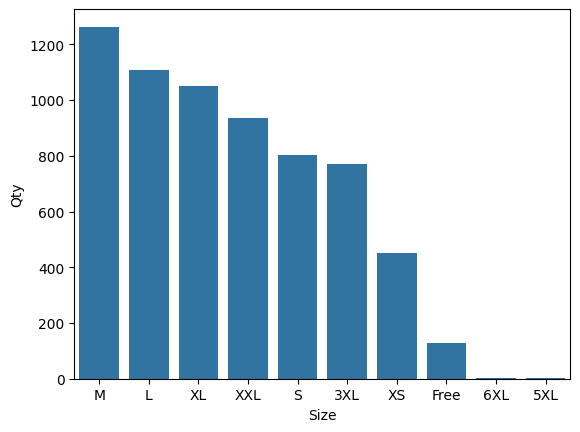

In [ ]:
S_Qty=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

sns.barplot(x='Size',y='Qty', data=S_Qty)

## Courier Status

<Axes: xlabel='Courier Status', ylabel='count'>

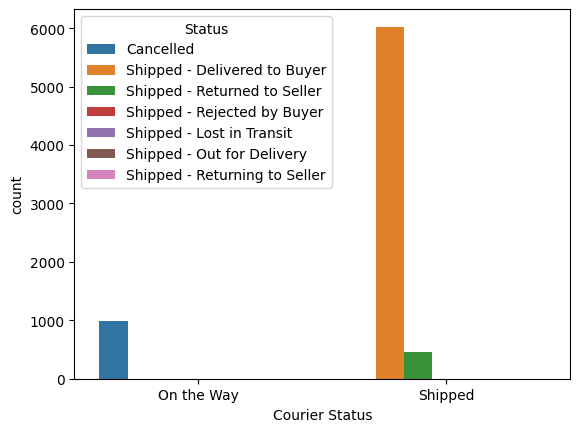

In [ ]:
sns.countplot(data=df, x='Courier Status',hue= 'Status')

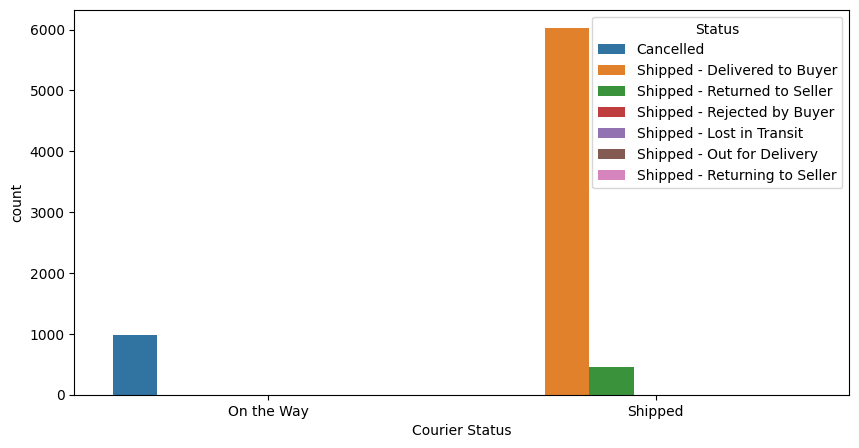

In [ ]:

plt.figure(figsize=(10,5))

ax=sns.countplot(data=df, x='Courier Status',hue= 'Status')

plt.show()

<Axes: >

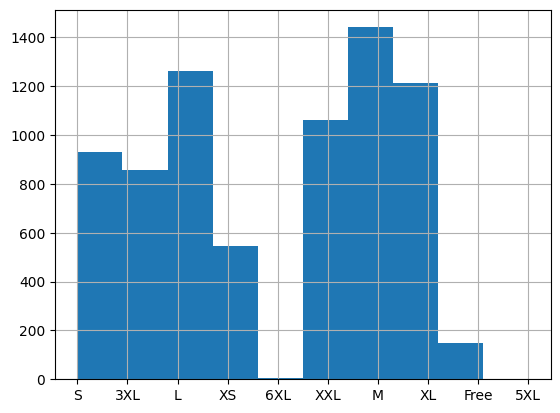

In [ ]:
#histogram
df['Size'].hist()

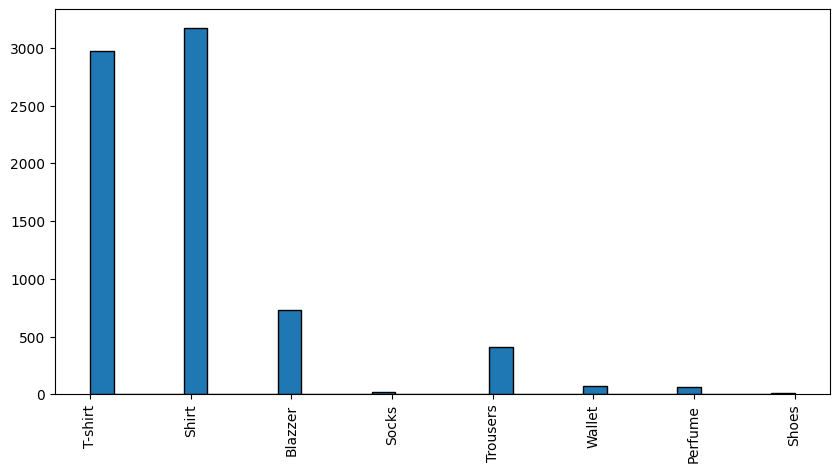

In [ ]:
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize=(10, 5))
plt.hist(column_data, bins=30, edgecolor='Black')
plt.xticks(rotation=90)
plt.show()

Note: From above Graph you can see that most of the buyers are T-shirt

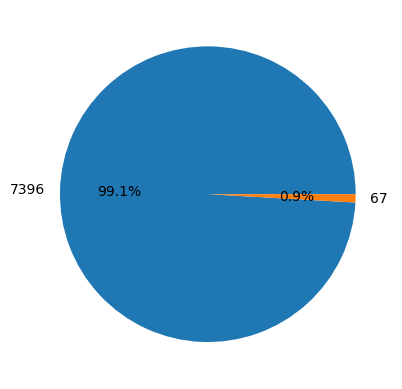

In [ ]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

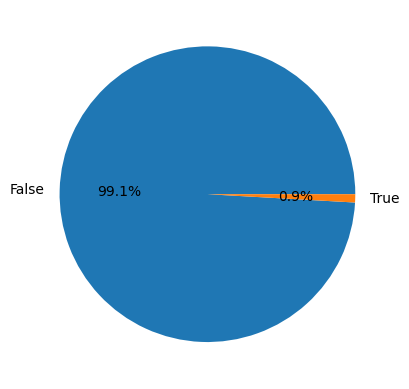

In [ ]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

Note : From above chart we can see that maximum i.e. 99.3% of buyers are retailers and 0.7% are B2B buyers

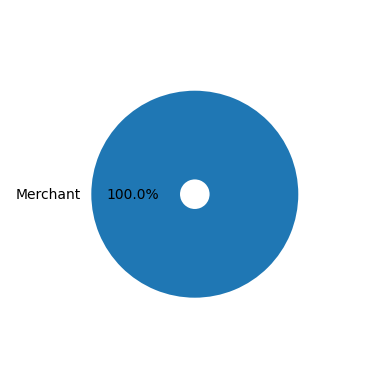

In [ ]:
#  Prepare data for pie chart
a1 = df['Fulfilment'].value_counts()

# Step 4: Plot the pie chart
fig, ax = plt.subplots()

ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()

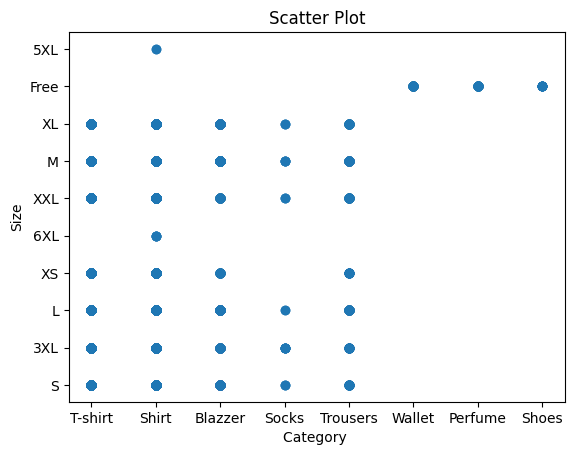

In [ ]:
# Prepare data for scatter plot
x_data = df['Category']
y_data = df['Size']

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category ')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()

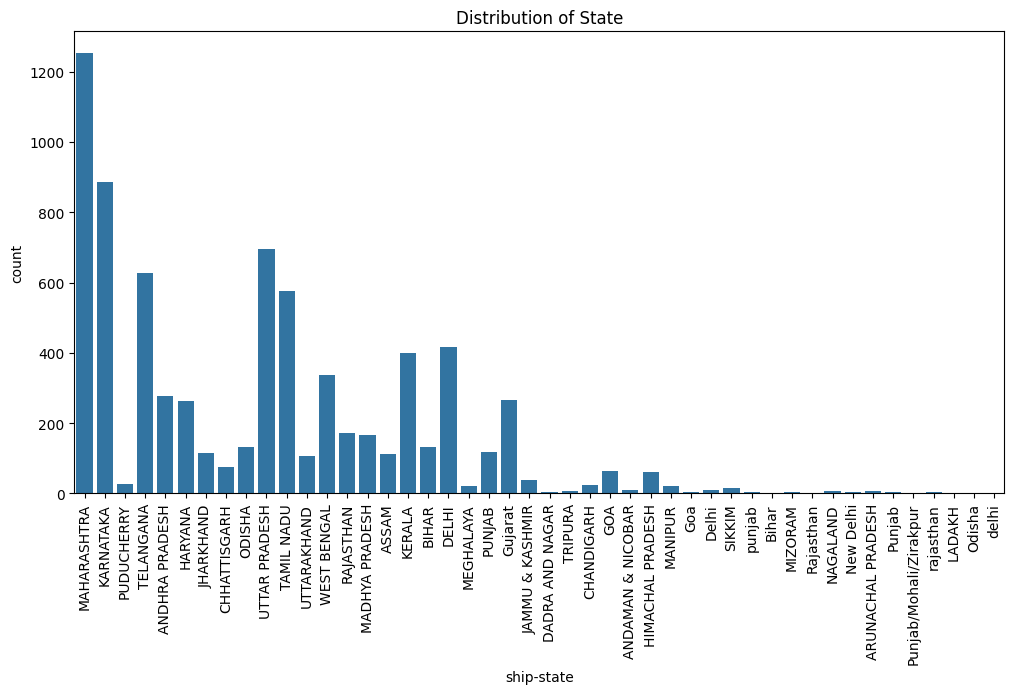

In [ ]:
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

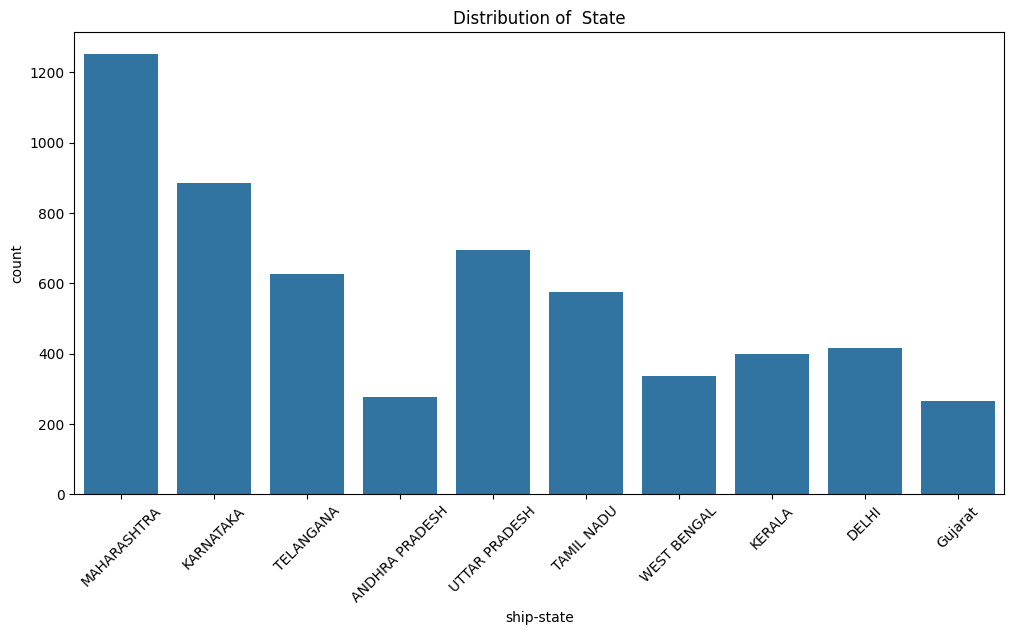

In [ ]:
# top_10_States
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

Note: From above Graph you can see that most of the buyers are Maharashtra state

# Conclusion

The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.